In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [5]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER


In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measure = Base.classes.measurement
Station = Base.classes.station

In [8]:
session = Session(engine)

# 
### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

In [9]:
# Latest Date
session.query(Measure.date).order_by(Measure.date.desc()).first()

('2017-08-23')

In [10]:
#Find Precipitation Data from the Last 12 months
precip = session.query(Measure.date, Measure.prcp).\
    filter(Measure.date > '2016-08-23').\
    order_by(Measure.date).all() 

In [11]:
precip

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('

In [12]:
#Convert query to a DF
precip_df = pd.DataFrame(precip)
date_precip_df = precip_df.set_index("date")
date_precip_df.head()


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


<IPython.core.display.Javascript object>


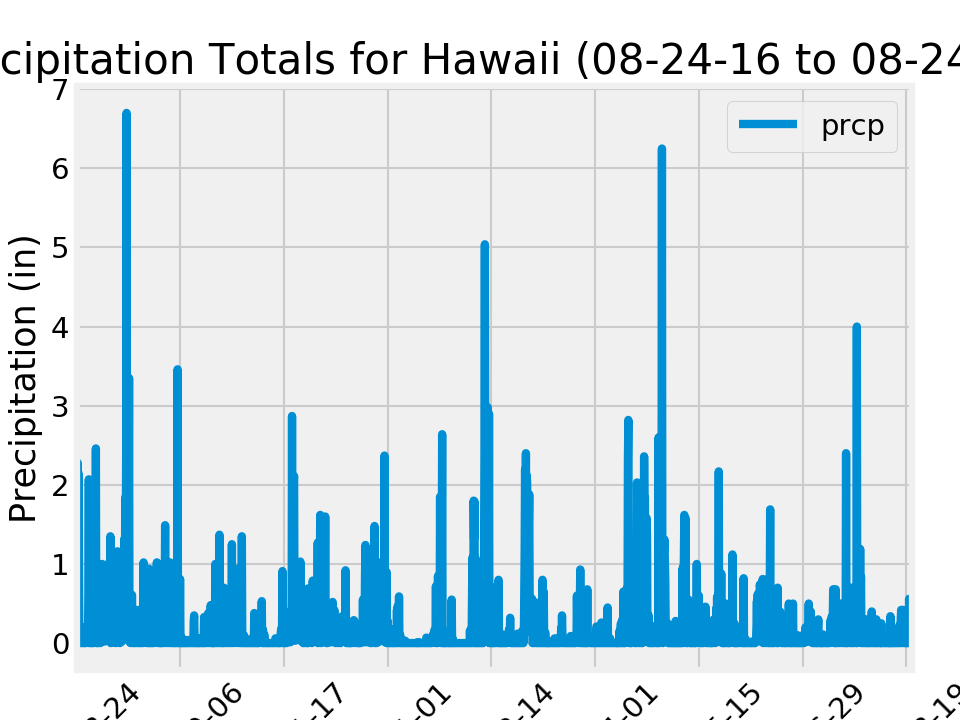

In [13]:
#create a plot

thing = date_precip_df.plot(title='Precipitation Totals for Hawaii (08-24-16 to 08-24-17)')

plt.xticks(rotation= '45')
thing.set_ylabel("Precipitation (in)")
plt.show()

fig = thing.get_figure()
fig.savefig('asdf.png')



# ### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [27]:
# Find total number of stations
station_names = session.query(Station.station).all()
station_names

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [33]:
# Total tobs
tobs = session.query(Measure.station, Measure.date, Measure.tobs).order_by(Measure.date).\
filter(Measure.date > '2016-08-23').all()
tobs

[('USC00519397', '2016-08-24', 79),
 ('USC00513117', '2016-08-24', 76),
 ('USC00514830', '2016-08-24', 80),
 ('USC00519523', '2016-08-24', 79),
 ('USC00519281', '2016-08-24', 77),
 ('USC00516128', '2016-08-24', 74),
 ('USC00519397', '2016-08-25', 80),
 ('USC00513117', '2016-08-25', 77),
 ('USC00514830', '2016-08-25', 81),
 ('USC00517948', '2016-08-25', 81),
 ('USC00519523', '2016-08-25', 80),
 ('USC00519281', '2016-08-25', 80),
 ('USC00516128', '2016-08-25', 77),
 ('USC00519397', '2016-08-26', 79),
 ('USC00513117', '2016-08-26', 78),
 ('USC00514830', '2016-08-26', 81),
 ('USC00517948', '2016-08-26', 81),
 ('USC00519523', '2016-08-26', 84),
 ('USC00519281', '2016-08-26', 80),
 ('USC00519397', '2016-08-27', 77),
 ('USC00513117', '2016-08-27', 73),
 ('USC00514830', '2016-08-27', 81),
 ('USC00519523', '2016-08-27', 81),
 ('USC00519281', '2016-08-27', 75),
 ('USC00519397', '2016-08-28', 78),
 ('USC00513117', '2016-08-28', 73),
 ('USC00514830', '2016-08-28', 81),
 ('USC00519523', '2016-08-28

In [15]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?

# Total dates
active = session.query(Measure.station, func.count(Measure.date)).group_by(Measure.station).order_by(func.count(Measure.date)).all()
active

[('USC00518838', 342),
 ('USC00517948', 683),
 ('USC00511918', 1932),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00519523', 2572),
 ('USC00519397', 2685),
 ('USC00513117', 2696),
 ('USC00519281', 2772)]

In [16]:
#most active station
most = active[8]
most

('USC00519281', 2772)

In [17]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12.

#Find Precipitation Data from the Last 12 months
tobs = session.query(Measure.tobs, Measure.station).\
    filter(Measure.date > '2016-08-23').\
    order_by(Measure.tobs).all()




In [18]:
tobs_df = pd.DataFrame(tobs)



In [19]:
tobs_df["station"].value_counts()

USC00519397    358
USC00519281    351
USC00513117    342
USC00516128    327
USC00519523    313
USC00514830    264
USC00517948     60
Name: station, dtype: int64

In [20]:
#use this value count number to filter the correct dataset

#Find Precipitation Data from the Last 12 months
tobs1 = session.query(Measure.tobs, Measure.station).\
    filter(Measure.date > '2016-08-23').\
    filter(Measure.station == 'USC00519397').\
    order_by(Measure.tobs).all()


<IPython.core.display.Javascript object>


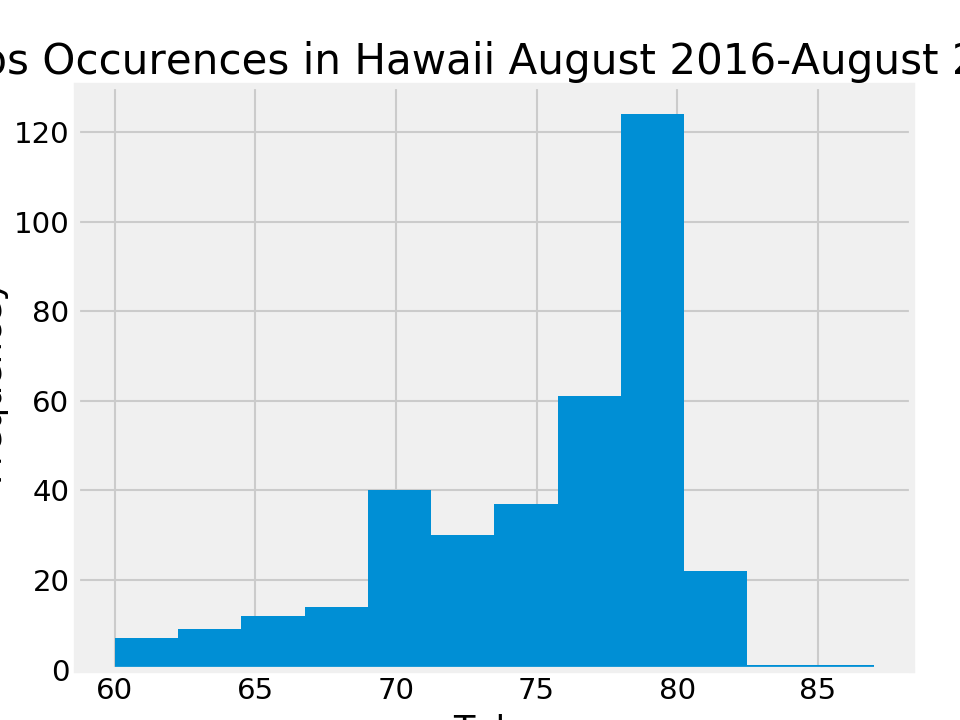

In [21]:
#histogram the data
tobs1_df = pd.DataFrame(tobs1)
data = tobs1_df['tobs']

thing2 = data.hist(bins = 12)
thing2.set_ylabel("Frequencey")
thing2.set_xlabel("Tobs")
plt.title('Tobs Occurences in Hawaii August 2016-August 2017')

plt.show()


### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>

In [22]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measure.tobs), func.avg(Measure.tobs), func.max(Measure.tobs)).\
        filter(Measure.date >= start_date).filter(Measure.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62, 69.3921568627451, 74)]


In [35]:
def calc_temp_start(start_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
    
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measure.tobs), func.avg(Measure.tobs), func.max(Measure.tobs)).\
        filter(Measure.date >= start_date).all()
print(calc_temp_start('2012-02-28'))

[(53, 73.30233306516493, 87)]


In [23]:
trip = calc_temps('2017-01-11', '2017-01-16')
trip

[(63, 69.37037037037037, 80)]

In [24]:
trip_lt = list(np.ravel(trip))
data = trip_lt[1]
delta= trip_lt[2]-trip_lt[0]
width = .00000000000000000000000000000000000000000000000000000000000001
N = 1
ind = np.arange(N)

<IPython.core.display.Javascript object>


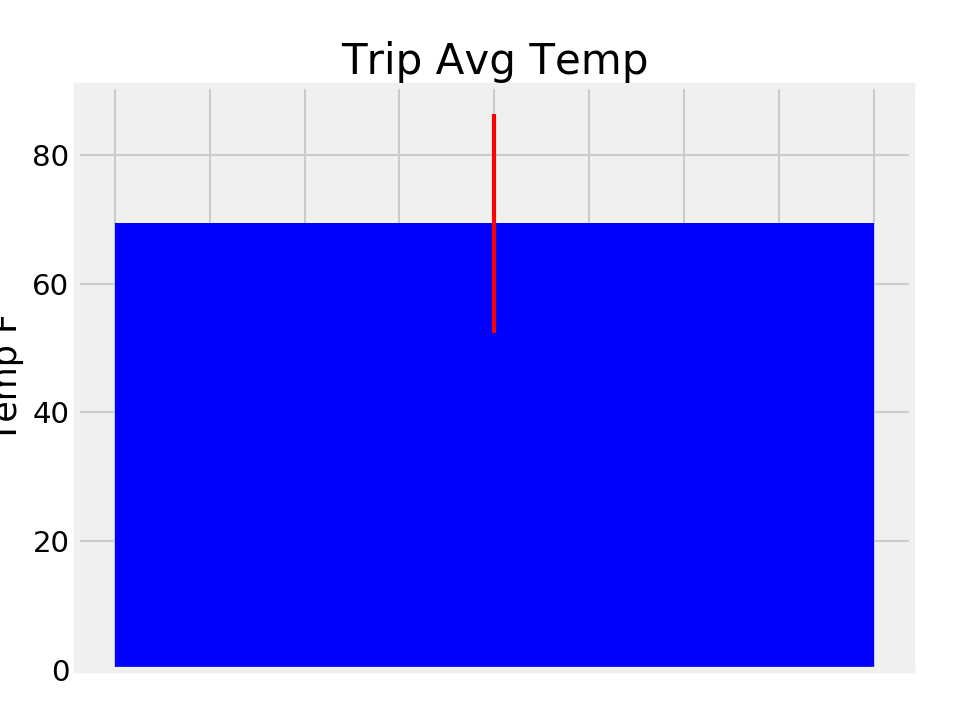

In [25]:
thing3 = plt.bar(ind, data,
                color='blue',
                yerr=delta,
                error_kw=dict(elinewidth=2,ecolor='red'))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.ylabel("Temp F")
plt.title("Trip Avg Temp")
plt.show()